# Support Vector Machines 

- Classification, regression, outlier detection, clustering

- Great for <1000 data points

- Below will do supervised linear classification

The SVM acts to draw a hyperplane between the groups that maximizes the margin between them.

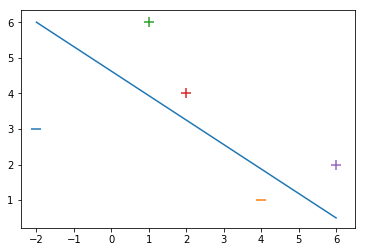

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#X,Y,bias
X = np.array([[-2,3,-1],
             [4,1,-1],
             [1,6,-1],
             [2,4,-1],
             [6,2,-1]])

#labels
y=np.array([-1,-1,1,1,1])

for d, sample in enumerate(X):
    if d<2:
        plt.scatter(sample[0],sample[1],s=120,marker='_',linewidths=2)
    else:
        plt.scatter(sample[0],sample[1],s=120,marker='+',linewidths=2)
        
plt.plot([-2,6],[6,0.5])
plt.show()

### Hinge Loss Function: 

$$c(x,y,f(x)=(1-yf(x))_+$$

Where $x$ is the sample $y$ is the true label and $f(x)$ is the predicted label. The + denotes that if the function is negative it is 0.

### Objective Function

$$min_w\lambda \parallel w \parallel^2+\sum\limits_{i=1}^n (1-y_i\langle{x_i,w}\rangle)_+$$

The first term is a regularizer and the second is the loss.

The gradient of the objective function is taken in order to perfrom gradient descent.

$$\frac{\partial}{\partial w_k}\lambda\parallel w \parallel^2 = 2\lambda w_k\\\frac{\partial}{\partial w_k}(1-y_i\langle{x_i,w}\rangle)_+ = \left\{
                                                                \begin{array}{11}
                                                    0 & \quad if y_i\langle{x_i,w}\rangle \geq 1 \\
                                                    -y_i x_ik & \quad else 
                                                    \end{array}
                                                    \right.
$$

Each missclassification if a sample will update the weight vector using the gradients, else if classified correctly, update the gradient of the regularizer. 

Misclassification occurs if:

$$y_i\langle{x_i,w_i}\rangle < 1$$

Update rule for weights when misclassified:

$$w=w+\eta(y_i x_i -2\lambda w)$$

The regularizer, $\lambda$ is like a tuning knob that gives indication how best to fit the data. If the regularizer is too high, overfit is at risk and vice versa. It controls the trade off between achieving low training error and a low testing error that is the abilit to generalize the classifier to unseen data. Generally, a regularizing parameter of 1/epochs is chosen, as the parameter decreases, epochs increases.

The learning rate, $\eta$ is the step size the algorithm takes on the error curve. If it is too high, the algorithm might overshoot, while if it is too low it might take a long time or never converge

If classified correctly:

$$w = w+\eta(-2\lambda w)$$

In [30]:
#Stochastic gradient descent to seperate hyperplanes

def svm_sgd_plot(X,Y):
    w = np.zeros(len(X[0]))
    #learning rate
    eta = 1
    #iterations
    epochs=10000
    #missclassifications
    errors = []
    
    #training with gd
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #missclassification update for weights
            if (Y[i]*np.dot(X[i],w))<1:
                w = w+eta*((X[i]*Y[i])+(-2*(1/epoch)*w))
                error = 1
            else:
                #correct classification update our weights
                w= w+eta *(-2 *(1/epoch)*w)
        errors.append(error)
    plt.plot(errors,'|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel("Epoch")
    plt.ylabel("Misclassified")
    
    return w
            

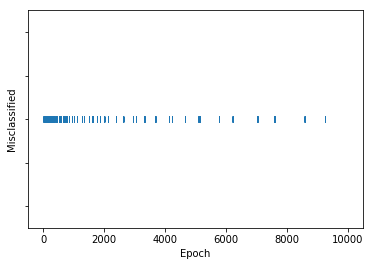

In [33]:
import warnings
warnings.filterwarnings("ignore")
w =svm_sgd_plot(X,y)

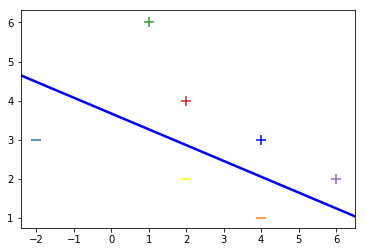

In [32]:
for d, sample in enumerate(X):
    #PLot negatives
    if d <2:
        plt.scatter(sample[0],sample[1],s=120,marker='_',linewidths=2)
    else:
        plt.scatter(sample[0],sample[1],s=120,marker='+',linewidths=2)
    
#Add test samples
plt.scatter(2,2,s=120,marker='_',linewidths=2,color='yellow')
plt.scatter(4,3,s=120,marker='+',linewidths=2,color='blue')

#print hyperplane found by svm_sgd
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3=np.array([x2,x3])
Xb,Y,U,V=zip(*x2x3)
ax=plt.gca()
ax.quiver(Xb,Y,U,V,scale=1,color='blue')